In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
# identify datatypes of the 12 columns, add the stats to the datadict
datadict = pd.DataFrame(df.dtypes)
datadict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = df.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [9]:
# get discriptive statistcs on "number" datatypes
df.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='Age', ylabel='Density'>

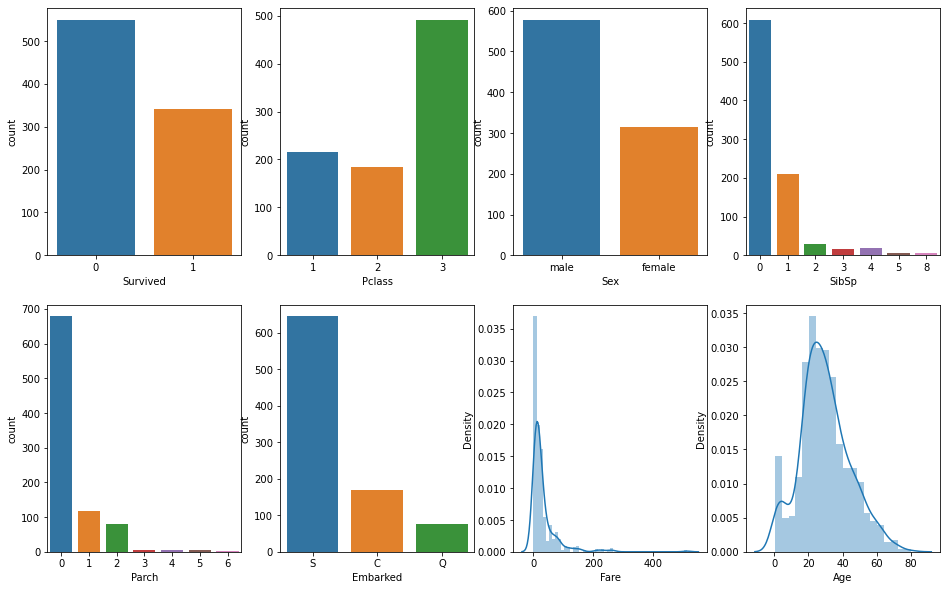

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=df,ax=axes[0,0])
sns.countplot('Pclass',data=df,ax=axes[0,1])
sns.countplot('Sex',data=df,ax=axes[0,2])
sns.countplot('SibSp',data=df,ax=axes[0,3])
sns.countplot('Parch',data=df,ax=axes[1,0])
sns.countplot('Embarked',data=df,ax=axes[1,1])
sns.distplot(df['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df['Age'].dropna(),kde=True,ax=axes[1,3])

In [13]:
# Transforming the Sex into 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [14]:
# Fill missing values in age
df['Age'].fillna(df['Age'].median(),inplace=True)

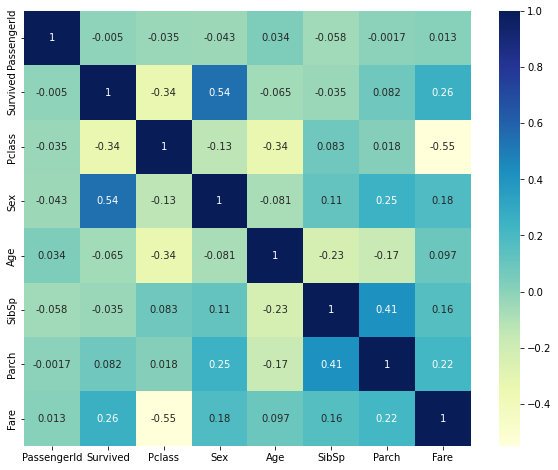

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

<AxesSubplot:xlabel='Sex'>

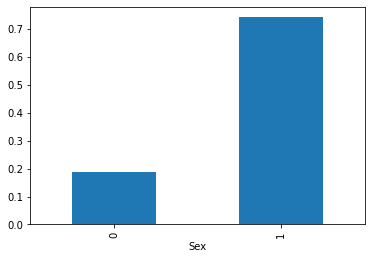

In [16]:
df.groupby('Sex').Survived.mean().plot(kind='bar')

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Build a model (ANN) in tensorflow/keras

In [17]:
from tensorflow_addons import losses

C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Hamza_Mustafa\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(712, input_dim=6, activation='relu'),
        keras.layers.Dense(356, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
# X = df[['Age', 'Sex']]
y = df['Survived']

In [48]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [49]:
X_train.shape

(712, 6)

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
23/23 [==============================] - 1s 4ms/step - loss: 2.1179 - accuracy: 0.5829
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.0066 - accuracy: 0.6194
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7095 - accuracy: 0.6770
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.7107
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5648 - accuracy: 0.7247
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.6966
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7177
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.7528
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5741 - accuracy: 0.7416
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4877 - accuracy: 0.7823
Epoch 11/

23/23 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8202
Epoch 84/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8174
Epoch 85/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.8202
Epoch 86/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.8244
Epoch 87/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4022 - accuracy: 0.8174
Epoch 88/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.8315
Epoch 89/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.8118
Epoch 90/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4051 - accuracy: 0.8315
Epoch 91/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4078 - accuracy: 0.8287
Epoch 92/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4029 - accuracy: 0.8132
Epoch 93/100
